Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Import the data from the csv file into a pandas dataframe

In [ ]:
vehicles = pd.read_csv('https://raw.githubusercontent.com/brianga0/Fuel-Consumption-Rating-Prediction/main/MY2022%20Fuel%20Consumption%20Ratings.csv')

In [ ]:
#displaying dataframe
vehicles

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


Checking the features in the dataset

In [ ]:
vehicles.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

Checking the amount of data in the set

In [ ]:
vehicles.shape

(946, 15)

Check the data types

In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

Generating a correlation matrix

<ipython-input-37-f3ae0b712347>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(vehicles.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

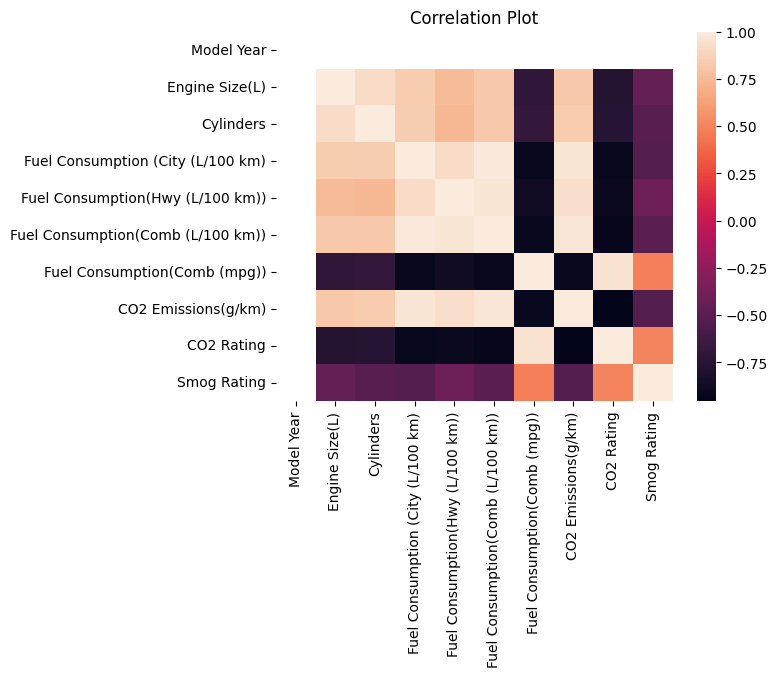

In [ ]:
sns.heatmap(vehicles.corr())
plt.title('Correlation Plot')
plt.show

Visualize the engine sizes(L)

<function matplotlib.pyplot.show(close=None, block=None)>

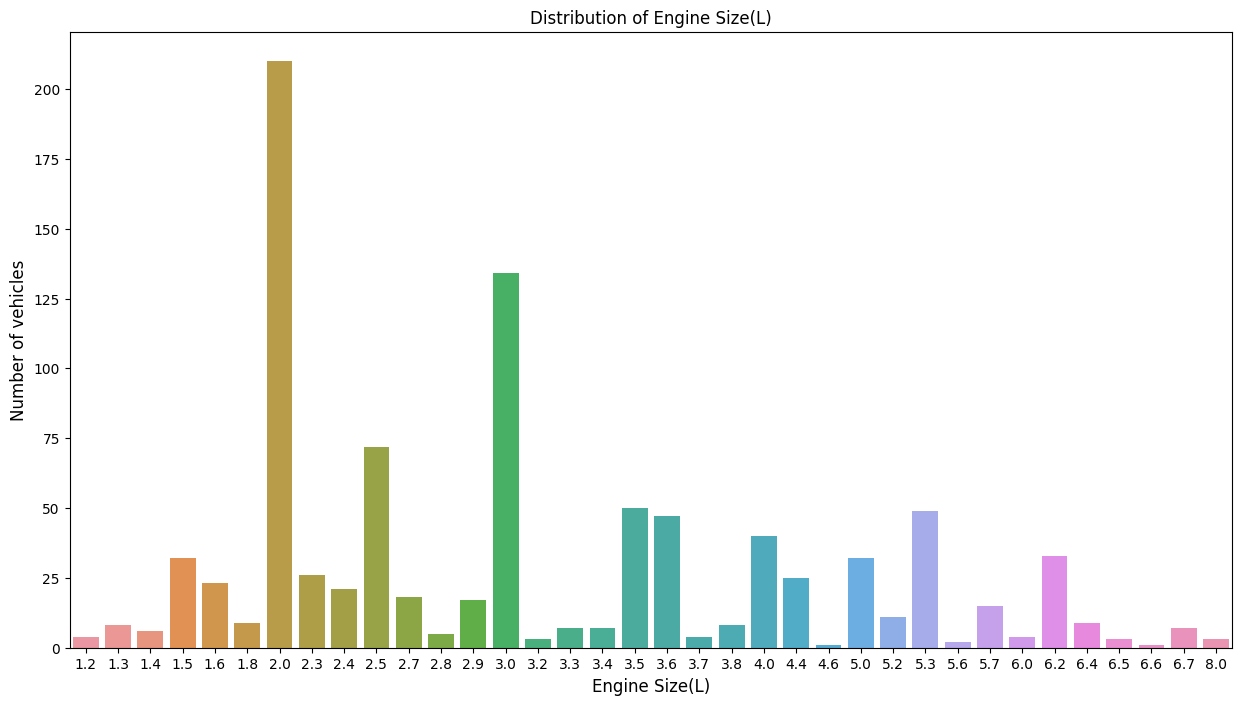

In [ ]:
engine_size_count = vehicles['Engine Size(L)'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x = engine_size_count.index, y = engine_size_count.values, alpha = 1)
plt.title('Distribution of Engine Size(L)')
plt.ylabel('Number of vehicles', fontsize = 12)
plt.xlabel('Engine Size(L)', fontsize = 12)
plt.show

Visualize the distribution between transmission type

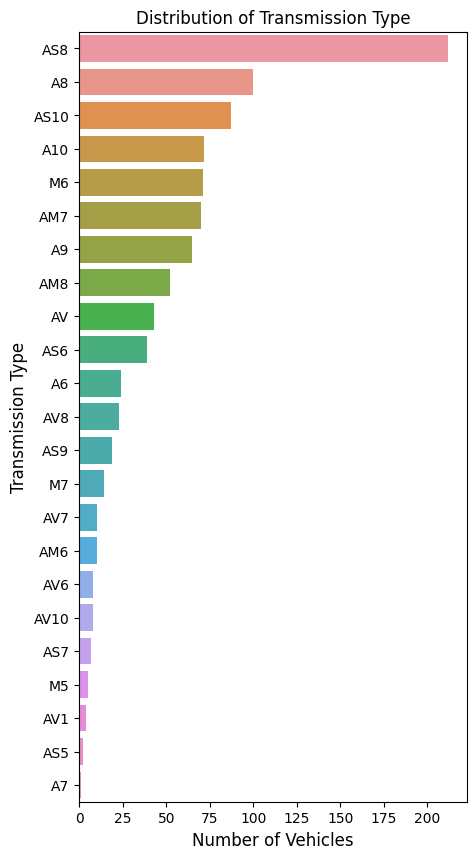

In [ ]:
transmission_type = vehicles['Transmission'].value_counts()
plt.figure(figsize=(5,10))
sns.barplot(x = transmission_type.values, y = transmission_type.index, alpha = 1, orient='h')
plt.title('Distribution of Transmission Type')
plt.ylabel('Transmission Type', fontsize=12)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.show()

Visualize the distribution of fuel type

<function matplotlib.pyplot.show(close=None, block=None)>

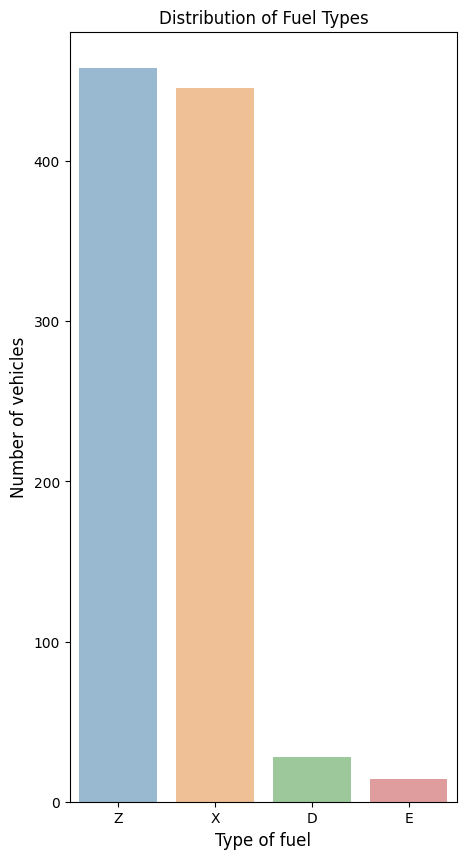

In [ ]:
fueltype_count = vehicles['Fuel Type'].value_counts()
plt.figure(figsize=(5,10))
sns.barplot(x = fueltype_count.index, y = fueltype_count.values, alpha = 0.5)
plt.title('Distribution of Fuel Types')
plt.ylabel('Number of vehicles', fontsize = 12)
plt.xlabel('Type of fuel', fontsize = 12)
plt.show

Check for missing values

In [ ]:
vehicles.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [ ]:
vehicles

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


One Hot Encoding for Categorical Columns - Transmission and Fuel Type

In [ ]:
#Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [ ]:
#Select categorical columns for encoding
categorical_columns = ['Transmission', 'Fuel Type']
vehicles_categorical = vehicles[categorical_columns]

#Fit and transform the data
vehicles_encoded = encoder.fit_transform(vehicles_categorical)

#Convert the output to a Dataframe
columns = encoder.get_feature_names_out(categorical_columns)
vehicles_encoded_df = pd.DataFrame(vehicles_encoded, columns=columns)

#Drop original categorical columns and join the endoded Dataframe
vehicles = vehicles.drop(categorical_columns, axis=1)
vehicles = pd.concat([vehicles, vehicles_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Display the dataframe after encoding

In [ ]:
vehicles

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,2022,Acura,ILX,Compact,2.4,4,9.9,7.0,8.6,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,12.6,9.4,11.2,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,11.0,8.6,9.9,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,11.3,9.1,10.3,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,11.2,8.0,9.8,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,10.7,7.7,9.4,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,10.5,8.1,9.4,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,11.0,8.7,9.9,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,11.5,8.4,10.1,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Separate data into features (x) and targets (y)

Will not consider the following columns:

Model Year, Make, Model, Vehicle Class, Fuel Consumption(Comb(L/100 km)), Fuel Consumption(Comb(mpg)), CO2 Emissions(g/km) (predicting this value), CO2 Rating, Smog Rating





In [ ]:
X = vehicles.drop(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'], axis=1)
y = vehicles['CO2 Emissions(g/km)']

Taking a look at the feature set

In [ ]:
X

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Transmission_A10,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM6,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,2.4,4,9.9,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.5,6,12.6,9.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,4,11.0,8.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,4,11.3,9.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,4,11.2,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2.0,4,10.7,7.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
942,2.0,4,10.5,8.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
943,2.0,4,11.0,8.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
944,2.0,4,11.5,8.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Take a look at the labels

In [ ]:
y

0      200
1      263
2      232
3      242
4      230
      ... 
941    219
942    219
943    232
944    236
945    252
Name: CO2 Emissions(g/km), Length: 946, dtype: int64

Splitting the dataset into training and tests sets in the ratio 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2)

Create the model and fit (train) on the training data

In [ ]:
#load the linear regression model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

Make predictions on the test data

In [ ]:
#model evalutation
#test model on our test data
y_pred = LR.predict(X_test)

Calculating the Coefficients

In [ ]:
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [ 2.85120173e-01 -1.08657737e-01  1.24985016e+01  1.09243686e+01
  4.75501572e-01 -1.01681427e+00 -5.57112847e-01  2.09952885e-01
  5.48920820e-01 -5.69136739e-02  4.02275760e-01  2.68788437e+00
  3.03093717e-02 -2.18007976e+00  3.80350706e-01  2.14407203e+00
  3.14727775e-01  5.03730207e-01 -5.18746225e-01  5.15366693e-01
 -6.09558349e-01 -2.46762710e+00 -1.36417964e-01 -9.93074910e-02
 -8.90512881e-01  1.80618854e-01  1.39379519e-01  5.35196151e+01
 -9.14597838e+01  1.92667469e+01  1.86734218e+01]


Calculate the intercept

In [ ]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -18.278776352465684


Calculating R-squared

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.9966476466990026


Calculating the MSE

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 13.493817725954928


Calculating RMSE

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 3.6733932168983663


Calculating the MAE

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 1.5777986397317703


In [ ]:
y_pred

array([185.6959752 , 266.74199549, 305.5291356 , 222.44139964,
       326.41998729, 322.64950098, 380.604524  , 314.01253805,
       249.53792582, 262.18722083, 194.23250093, 321.93315237,
       157.06032179, 353.31935585, 244.94842689, 263.40732465,
       287.16531398, 193.93738053, 229.81594536, 293.83516436,
       352.63713426, 378.67517786, 271.52970431, 175.05081964,
       226.84747524, 218.71102974, 322.48857078, 248.61454603,
       272.98269057, 283.78726851, 179.48488199, 191.13947556,
       144.40451237, 245.22652683, 306.64393553, 162.47186263,
       344.01318124, 344.23368783, 259.47759296, 244.59909788,
       269.37805983, 262.07583769, 379.55241296, 157.41360873,
       275.59947837, 227.99587096, 335.00156198, 239.27805957,
       190.18059294, 167.7810932 , 353.7605887 , 159.80311109,
       280.17552066, 181.22703291, 221.12642319, 336.29369349,
       244.1702232 , 251.77739113, 199.03771001, 166.13905824,
       267.79500704,  93.55166219, 204.84506957, 245.74

Export the model as pickle

In [ ]:
import pickle

with open('carbon_emission_prediction_model.pkl', 'wb') as f:
  pickle.dump(LR, f)